In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from unidecode import unidecode

In [3]:
train_df = pd.read_csv("Divar.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_13628\960344712.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("Divar.csv")


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [4]:
df_subset = train_df.iloc[:, 23:52]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   land_size                186396 non-null  float64
 1   building_size            980394 non-null  float64
 2   deed_type                253458 non-null  object 
 3   has_business_deed        34679 non-null   object 
 4   floor                    541748 non-null  object 
 5   rooms_count              845899 non-null  object 
 6   total_floors_count       304352 non-null  object 
 7   unit_per_floor           302283 non-null  object 
 8   has_balcony              506411 non-null  object 
 9   has_elevator             541749 non-null  object 
 10  has_warehouse            728155 non-null  object 
 11  has_parking              728156 non-null  object 
 12  construction_year        815828 non-null  object 
 13  is_rebuilt               529470 non-null  object 
 14  has

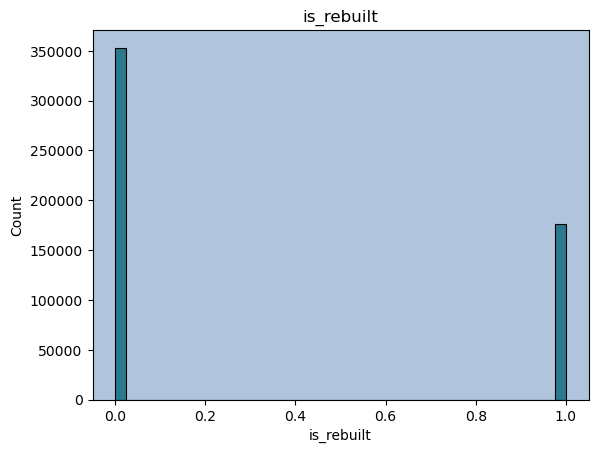

In [5]:
# df_subset.is_rebuilt.value_counts()
df_subset.is_rebuilt = df_subset.is_rebuilt.map({False:0, True:1})
plt.title("is_rebuilt")
sns.histplot((df_subset.is_rebuilt), color="#005f73")
plt.gca().set_facecolor("lightsteelblue")

# df_subset.is_rebuilt.value_counts()

In [6]:
df_subset.has_water = df_subset.has_water.map({False:0, True:1})
df_subset.has_water.value_counts()

has_water
0.0    17083
1.0    16361
Name: count, dtype: int64

## land_size

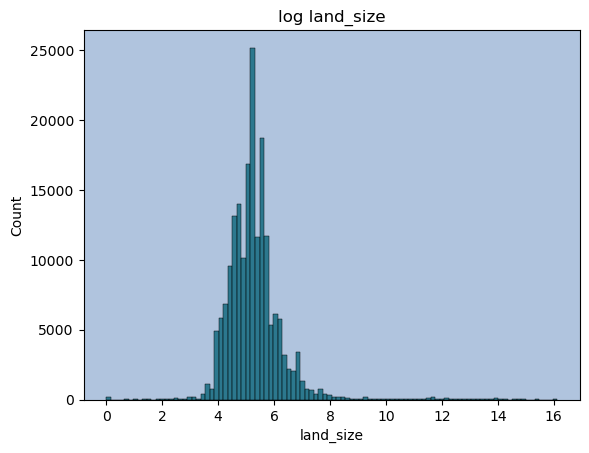

In [13]:
plt.title("log land_size")
sns.histplot(np.log(df_subset.land_size), color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

In [ ]:
df_subset.land_size = np.log(df_subset.land_size)

## building_size

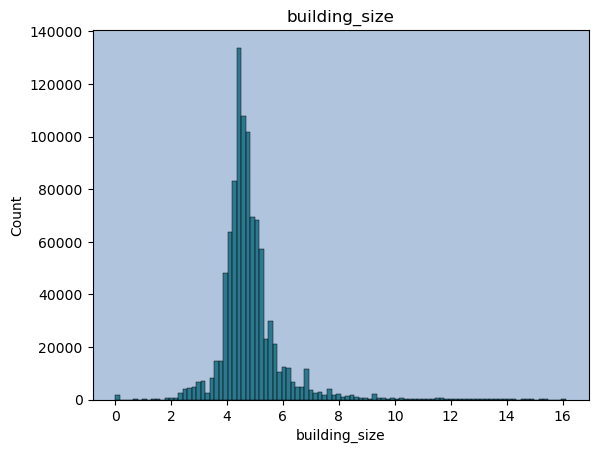

In [ ]:
plt.title("log building_size")
sns.histplot(np.log(df_subset.building_size), color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

In [ ]:
df_subset.building_size = np.log(df_subset.building_size)

## deed_type

In [5]:
df_subset.deed_type.value_counts()

deed_type
single_page          194262
written_agreement     31873
other                 20288
multi_page             6466
unselect                569
Name: count, dtype: int64

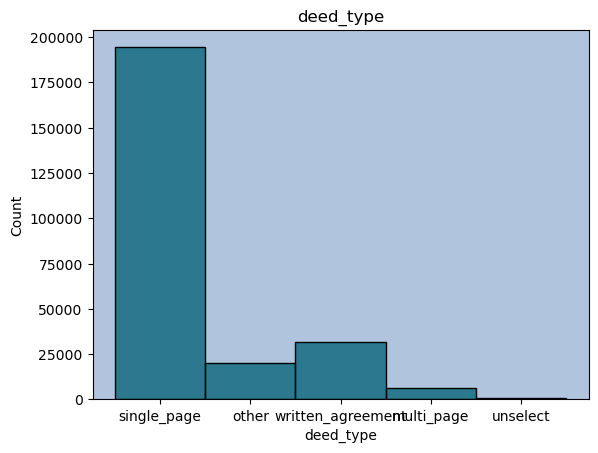

In [21]:
plt.title("deed_type")
sns.histplot((df_subset.deed_type), color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

## has_business_deed 

In [20]:
df_subset.has_business_deed.value_counts()
df_subset.has_business_deed = df_subset.has_business_deed.map({False:0, True:1})

## rooms_count

In [17]:
df_subset.rooms_count.value_counts()

rooms_count
دو              404050
یک              192083
سه              138633
بدون اتاق        75898
چهار             21371
پنج یا بیشتر     13864
Name: count, dtype: int64

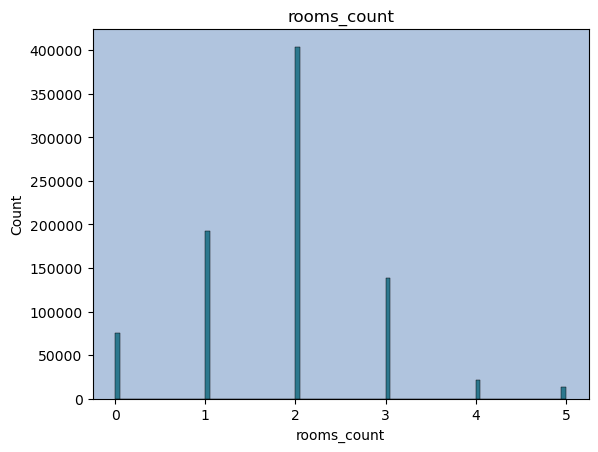

In [18]:
df_subset.rooms_count = df_subset.rooms_count.map({"یک":1, "دو":2, "سه":3, "بدون اتاق":0, "چهار":4, "پنج یا بیشتر":5})
plt.title("rooms_count")
sns.histplot(df_subset.rooms_count, color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

## floor

In [ ]:
import re
def object_to_int(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    
    if val.endswith("+"):
        return int(val.replace("+", ""))
    
    if re.match(r"more[_ ]than[_ ](\d+)", val):
        return int(re.findall(r"\d+", val)[0]) + 1 
    
    
    
    if val == "unselect":
        return -1
    
    return int(float(val))



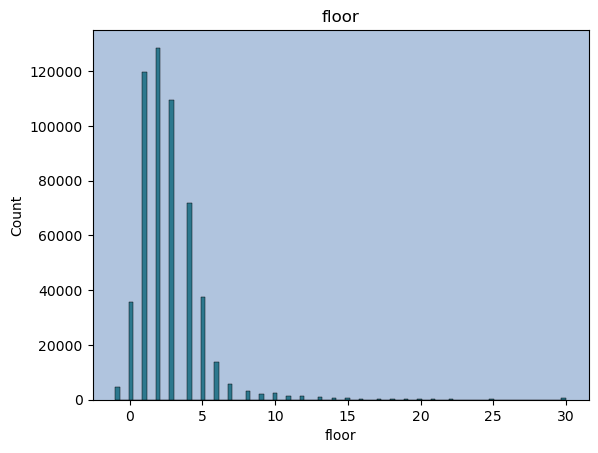

In [ ]:
df_subset.floor = df_subset.floor.apply(object_to_int)
plt.title("floor")
sns.histplot(df_subset.floor, color="#005f73", bins=100)
plt.gca().set_facecolor("lightsteelblue")

## rooms_count

In [32]:
df_subset.rooms_count = df_subset.rooms_count.apply(object_to_int)

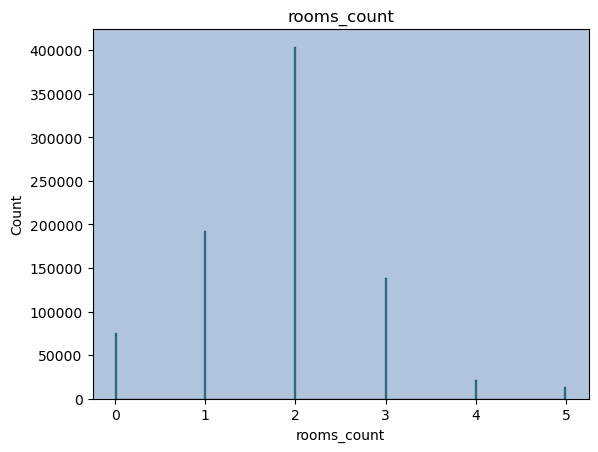

In [27]:
plt.title("rooms_count")
sns.histplot(df_subset.rooms_count, color="#005f73")
plt.gca().set_facecolor("lightsteelblue")

## total_floors_count

In [36]:
df_subset.total_floors_count = df_subset.total_floors_count.apply(object_to_int)

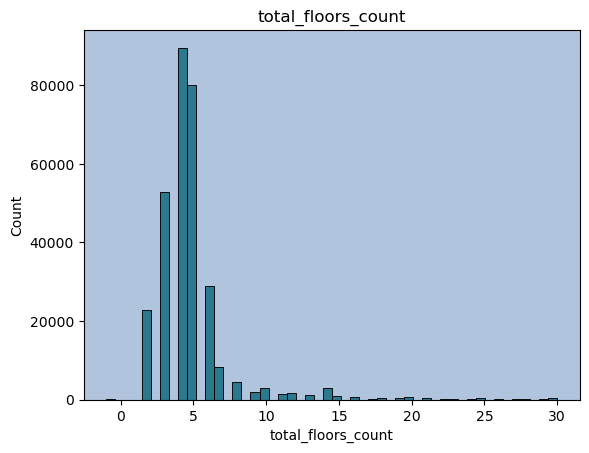

In [40]:
plt.title("total_floors_count")
sns.histplot(df_subset.total_floors_count, color="#005f73", bins=50)
plt.gca().set_facecolor("lightsteelblue")

## unit_per_floor

In [41]:
df_subset.unit_per_floor.value_counts()

unit_per_floor
2              119794
1               97712
4               36918
3               31423
6                4899
5                4811
8                3471
more_than_8      2083
7                 926
unselect          246
Name: count, dtype: int64

In [43]:
df_subset.unit_per_floor = df_subset.unit_per_floor.apply(object_to_int)

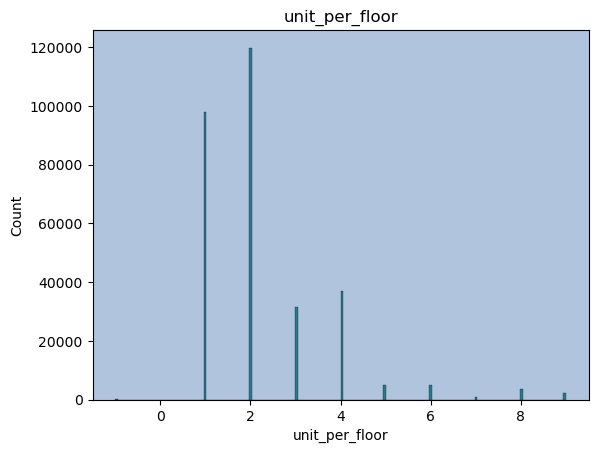

In [46]:
plt.title("unit_per_floor")
sns.histplot(df_subset.unit_per_floor, color="#005f73")
plt.gca().set_facecolor("lightsteelblue")

## has_balcony 

In [47]:
df_subset.has_balcony.value_counts()

has_balcony
true        392096
false        88855
True         20692
False         4545
unselect       223
Name: count, dtype: int64

In [50]:
def clean_bool(x):
    if isinstance(x, str):
        x_lower = x.strip().lower()
        if re.fullmatch(r"(true|false)", x_lower):
            return 1 if x_lower == "true" else 0
        elif x_lower == "unselect":
            return -1
    elif isinstance(x, bool):
        return int(x)
    else:
        return np.nan

## has_elevator

In [ ]:
df_subset.has_elevator.value_counts()

has_elevator
1.0    365148
0.0    176601
Name: count, dtype: int64

## has_warehouse

In [ ]:
df_subset.has_warehouse.value_counts()

has_warehouse
1.0    582313
0.0    145842
Name: count, dtype: int64

## has_parking

In [ ]:

df_subset.has_parking.value_counts()

has_parking
1.0    552542
0.0    175614
Name: count, dtype: int64

## construction_year

In [60]:
df_subset.construction_year.value_counts()

construction_year
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

### has_balcony, has_elevator, has_warehouse, has_parking, is_rebuilt, has_water, has_electricity, has_gas

In [67]:
df_subset.has_balcony = df_subset.has_balcony.apply(clean_bool)
df_subset.has_elevator = df_subset.has_elevator.apply(clean_bool)
df_subset.has_warehouse = df_subset.has_warehouse.apply(clean_bool)
df_subset.has_parking = df_subset.has_parking.apply(clean_bool)

df_subset.is_rebuilt = df_subset.is_rebuilt.apply(clean_bool)
df_subset.has_water = df_subset.has_water.apply(clean_bool)
df_subset.has_electricity = df_subset.has_electricity.apply(clean_bool)
df_subset.has_gas = df_subset.has_gas.apply(clean_bool)


## has_warm_water_provider

In [ ]:
df_subset.has_warm_water_provider.value_counts()

has_warm_water_provider
package         205641
water_heater    141082
powerhouse       31395
unselect          1382
Name: count, dtype: int64

In [64]:
df_subset.has_heating_system.value_counts()

has_heating_system
shoofaj          201356
heater           119771
duct_split        22047
floor_heating      7717
split              5845
fan_coil           5065
fireplace          4050
unselect           3118
Name: count, dtype: int64

In [65]:
df_subset.has_cooling_system.value_counts()

has_cooling_system
water_cooler       219266
air_conditioner     52341
split               38708
duct_split          29373
unselect             5917
fan_coil             5014
Name: count, dtype: int64